# Plot Rouge metrics

In [13]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pathlib import Path
import json
import pandas as pd

import sys

sys.path.append("..")

from src.data.dataloader import PromptLoader
from src.utils.eval_metric import eval_gigaword

load_dotenv()

True

# 1. Gigaword set

In [7]:
print("Loading dataset")
pl = PromptLoader()

Loading dataset


In [9]:
test_data = pl.load_testdata("gigaword")

In [54]:
# Define which folders to use
dataset_folder = Path("../experiments/mistral-7b/eval_data_gigaword/incontext_data_gigaword/")

# Process the folders to extract the evaluation metric

results = [] # Store results as a list of dicts

for folder in dataset_folder.iterdir():
    if folder.is_dir():
        print(f"Processing {folder.name}")
        # Load the predictions in predictions.json
        try:
            predictions = json.load(open(folder / "predictions.json"))
        except FileNotFoundError:
            print(f"Skipping {folder.name} as predictions.json not found")
            continue
        # Folder name is of the form "num_examples_{NUM}"
        num_examples = int(folder.name.split("_")[-1])

        scores = eval_gigaword(predictions, test_data)
        scores["num_examples"] = num_examples

        # Store the average length of the predictions
        scores["avg_pred_length"] = sum([len(x) for x in predictions]) / len(predictions)

        results.append(scores)

Processing num_examples_14
Processing num_examples_10
Processing num_examples_6
Processing num_examples_12
Processing num_examples_0
Processing num_examples_4
Processing num_examples_2
Processing num_examples_5
Processing num_examples_8
Processing num_examples_15


In [55]:
df = pd.DataFrame.from_records(results)
df = df.sort_values("num_examples")
df.head()

,rouge1,rouge2,rougeL,rougeLsum,num_examples,avg_pred_length
4,0.184194,0.050959,0.156835,0.156756,0,204.738596
6,0.193742,0.057752,0.165911,0.165777,2,198.406458
5,0.195547,0.058626,0.167988,0.167724,4,199.727832
7,0.194128,0.058535,0.167129,0.166980,5,199.810354
2,0.192556,0.057897,0.166406,0.166139,6,204.752435


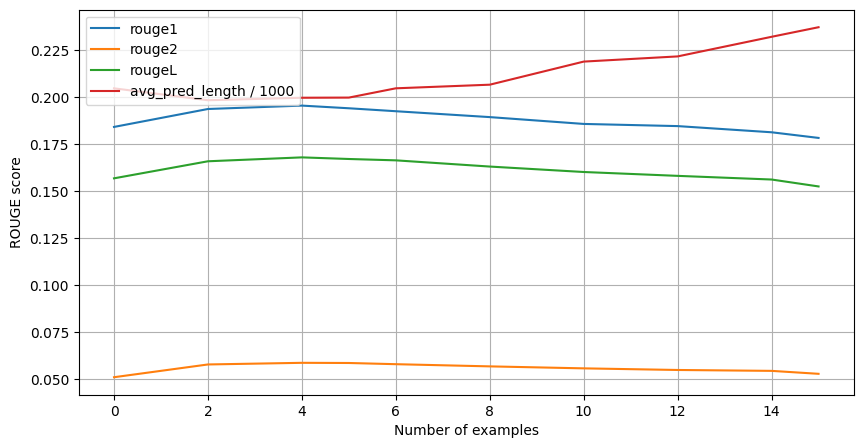

In [56]:
# Plot the results

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df["num_examples"], df["rouge1"], label="rouge1")
ax.plot(df["num_examples"], df["rouge2"], label="rouge2")
ax.plot(df["num_examples"], df["rougeL"], label="rougeL")
ax.plot(df["num_examples"], df["avg_pred_length"] / 1000, label="avg_pred_length / 1000")
ax.set_xlabel("Number of examples")
ax.set_ylabel("ROUGE score")
ax.legend()
ax.grid()
fig.savefig("gigaword.png")
plt.show()

In [43]:
predictions_4 = json.load(open(dataset_folder / "num_examples_4" / "predictions.json"))
predictions_15 = json.load(open(dataset_folder / "num_examples_15" / "predictions.json"))

In [44]:
print(sum([len(s) for s in predictions_4]))
print(sum([len(s) for s in predictions_15]))


389669
462917


In [46]:
predictions_4[1]

'The Sri Lankan government announced the closure of government schools in the north of the country on Wednesday due to an escalating military campaign against Tamil separatists.'